## Imports, Reading Data, Setting up tests

In [22]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [7]:
training_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/broadband_training_bin_1.csv')
test_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/broadband_test_bin_1.csv')

In [3]:
#These are taken from the PickingVariables notebook

all_broadband_variables = ["pct_internet", 
                           "pct_computer_with_broadband",
                           "pct_internet_broadband_any_type",
                           "pct_internet_none",
                           "pct_internet_cellular",
                           "pct_internet_no_subscrp",
                           "Ookla Median Download Speed (Mbps)",
                           "Ookla Median Upload Speed (Mbps)",
                           "All_Provider_Count_100",
                           "All_Provider_Count_25",
                           "pct_internet_broadband_satellite",
                           "Fixed_Wireless_Provider_Count_25",
                           "pct_internet_broadband_fiber",
                           "Wired_Provider_Count_100",
                           "Wired_Provider_Count_25",
                           "Fixed_Wireless_Provider_Count_100",
                           "Satellite_Provider_Count_100",
                           "Fixed_Wireless_Provider_Count",
                           "MaxAdUp",
                           "All_Provider_Count",
                           "Satellite_Provider_Count_25",
                           "pct_internet_other",
                           "pct_internet_dial_up",
                           "pct_internet_dial_up",
                           "Wired_Provider_Count",
                           "Satellite_Provider_Count"]

#All variables with correlation > 0.3
high_corr = ["pct_internet", 
             "pct_computer_with_broadband",
             "pct_internet_broadband_any_type",
             "pct_internet_none",
             "pct_internet_cellular",
             "pct_internet_no_subscrp"]

#All variables with correlation > 0.1
mid_corr = ["pct_internet", 
            "pct_computer_with_broadband",
            "pct_internet_broadband_any_type",
            "pct_internet_none",
            "pct_internet_cellular",
            "pct_internet_no_subscrp",
            "Ookla Median Download Speed (Mbps)",
            "Ookla Median Upload Speed (Mbps)",
            "All_Provider_Count_100",
            "All_Provider_Count_25"]

small_covariance_med_corr = ['pct_internet',
                             'Ookla Median Download Speed (Mbps)',
                             'All_Provider_Count_100',
                             'All_Provider_Count_25']

#All except income variables
all_vars = [ 'tract_geoid',
             'All_Provider_Count',
             'MaxAdDown',
             'MaxAdUp',
             'Wired_Provider_Count',
             'Satellite_Provider_Count',
             'Fixed_Wireless_Provider_Count',
             'All_Provider_Count_25',
             'All_Provider_Count_100',
             'Fixed_Wireless_Provider_Count_25',
             'Wired_Provider_Count_25',
             'Satellite_Provider_Count_25',
             'Fixed_Wireless_Provider_Count_100',
             'Wired_Provider_Count_100',
             'Satellite_Provider_Count_100',
             'median_age_overall',
             'median_age_male',
             'median_age_female',
             'state',
             'county',
             'tract',
             'employment_rate',
             'total_households',
             'ave_household_size',
             'ave_family_size',
             'pct_health_ins_children',
             'pct_health_ins_19_64',
             'pct_health_ins_65+',
             'total_population',
             'pct_white',
             'pct_hisp_latino',
             'pct_black',
             'pct_native',
             'pct_asian',
             'pct_hi_pi',
             'pct_other_race',
             'pct_two+_race',
             'pct_pop_bachelors+',
             'pct_pop_hs+',
             'pct_internet',
             'pct_internet_dial_up',
             'pct_internet_broadband_any_type',
             'pct_internet_cellular',
             'pct_only_cellular',
             'pct_internet_broadband_fiber',
             'pct_internet_broadband_satellite',
             'pct_internet_only_satellite',
             'pct_internet_other',
             'pct_internet_no_subscrp',
             'pct_internet_none',
             'pct_computer',
             'pct_computer_with_dialup',
             'pct_computer_with_broadband',
             'pct_computer_no_internet',
             'pct_no_computer',
             'ALAND',
             'AWATER',
             'ALAND_SQMI',
             'AWATER_SQMI',
             'population_density',
             'pct_pop_ged',
             'pct_pop_some_college',
             'pct_pop_associates',
             'pct_pop_lt_5',
             'pct_pop_5_to_9',
             'pct_pop_10_to_14',
             'pct_pop_15_to_19',
             'pct_pop_20_to_24',
             'pct_pop_25_to_29',
             'pct_pop_30_to_34',
             'pct_pop_35_to_39',
             'pct_pop_40_to_44',
             'pct_pop_45_to_49',
             'pct_pop_50_to_54',
             'pct_pop_55_to_59',
             'pct_pop_60_to_64',
             'pct_pop_65_to_69',
             'pct_pop_70_to_74',
             'pct_pop_75_to_79',
             'pct_pop_80_to_84',
             'pct_pop_gt_85',
             'pct_pop_disability',
             'pct_pop_households_with_kids',
             'pct_pop_foreign_born',
             'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
             'Ookla Median Download Speed (Mbps)',
             'Ookla Median Upload Speed (Mbps)',
             'Primary RUCA Code 2010',
             'Secondary RUCA Code, 2010 (see errata)',
             '0_5_providers',
             '6_10_providers',
             '11_15_providers',
             '16_20_providers',
             '20+_providers',
             '0_25_MaxAdDown',
             '25_99_MaxAdDown',
             '99_499_MaxAdDown',
             '499_inf_MaxAdDown',
             '0_25_Ookla Median Download Speed (Mbps)',
             '25_99_Ookla Median Download Speed (Mbps)',
             '99_499_Ookla Median Download Speed (Mbps)',
             '499_inf_Ookla Median Download Speed (Mbps)',
             '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             'single_provider',
             'Primary RUCA Code - 1.0',
             'Primary RUCA Code - 2.0',
             'Primary RUCA Code - 4.0',
             'Primary RUCA Code - 10.0',
             'Primary RUCA Code - 7.0',
             'Primary RUCA Code - 5.0',
             'Primary RUCA Code - 8.0',
             'Primary RUCA Code - 3.0',
             'Primary RUCA Code - 6.0',
             'Primary RUCA Code - 9.0',
             'Primary RUCA Code - 99.0',
             'Secondary RUCA Code - 1.0',
             'Secondary RUCA Code - 2.0',
             'Secondary RUCA Code - 4.0',
             'Secondary RUCA Code - 10.0',
             'Secondary RUCA Code - 7.0',
             'Secondary RUCA Code - 5.0',
             'Secondary RUCA Code - 1.1',
             'Secondary RUCA Code - 8.0',
             'Secondary RUCA Code - 3.0',
             'Secondary RUCA Code - 6.0',
             'Secondary RUCA Code - 9.0',
             'Secondary RUCA Code - 4.1',
             'Secondary RUCA Code - 99.0',
             'Secondary RUCA Code - 7.1',
             'Secondary RUCA Code - 10.2',
             'Secondary RUCA Code - 2.1',
             'Secondary RUCA Code - 10.1',
             'Secondary RUCA Code - 10.3',
             'Secondary RUCA Code - 7.2',
             'Secondary RUCA Code - 5.1',
             'Secondary RUCA Code - 8.1',
             'Secondary RUCA Code - 8.2']

## Modeling

### Functions

In [4]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [9]:
poverty_rate_train = np.array(training_data['poverty_rate'])
poverty_rate_test = np.array(test_data['poverty_rate'])

def poverty_XGBoost_model(train_df, 
                          test_df, 
                          variable_list,
                          poverty_rate_train = poverty_rate_train,  
                          poverty_rate_test = poverty_rate_test):
    train_variables = np.array(train_df[variable_list])
    test_variables = np.array(test_df[variable_list])
    
    model = XGBRegressor().fit(train_variables, poverty_rate_train)
    predicted = model.predict(test_variables)
    
    regression_results(poverty_rate_test, predicted)
    
    return pd.DataFrame(model.feature_importances_, 
                        index = variable_list).sort_values(by=0, ascending = False)


In [14]:
poverty_XGBoost_model(training_data, test_data, all_broadband_variables)

explained_variance:  0.4887
r2:  0.4886
MAE:  5.3967
MSE:  57.9994
RMSE:  7.6157


True

In [15]:
poverty_XGBoost_model(training_data, test_data, high_corr)

explained_variance:  0.4337
r2:  0.4337
MAE:  5.7247
MSE:  64.2296
RMSE:  8.0143


True

In [16]:
poverty_XGBoost_model(training_data, test_data, mid_corr)

explained_variance:  0.4648
r2:  0.4647
MAE:  5.5515
MSE:  60.7112
RMSE:  7.7917


True

In [17]:
poverty_XGBoost_model(training_data, test_data, small_covariance_med_corr) 

explained_variance:  0.43
r2:  0.4299
MAE:  5.6992
MSE:  64.6642
RMSE:  8.0414


True

In [10]:
feature_importance_all_vars = poverty_XGBoost_model(training_data, 
                                                    test_data, 
                                                    all_vars) 


explained_variance:  0.7913
r2:  0.7913
MAE:  3.6483
MSE:  25.001
RMSE:  5.0001


From the all_vars model, we can pick the top variables to use in the grid search. 

<AxesSubplot:>

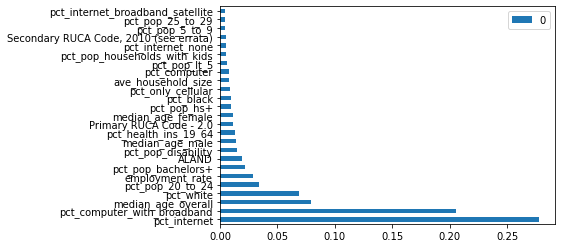

In [13]:
feature_importance_all_vars.head(25).plot.barh()

In [14]:
feature_importance_all_vars.head(7).index.values

array(['pct_internet', 'pct_computer_with_broadband',
       'median_age_overall', 'pct_white', 'pct_pop_20_to_24',
       'employment_rate', 'pct_pop_bachelors+'], dtype=object)

In [15]:
key_vars = ['pct_internet', 
            'pct_computer_with_broadband',
            'median_age_overall', 
            'pct_white', 
            'pct_pop_20_to_24',
            'employment_rate', 
            'pct_pop_bachelors+']

## Tuning the model

In [23]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

regressor_tuned = XGBRegressor()

regress = RandomizedSearchCV(estimator=regressor_tuned, 
                             param_distributions=params,
                             scoring='neg_mean_squared_error', 
                             verbose=10,
                             n_iter = 20,
                             cv = 3,
                             random_state=42)

regress.fit(training_data[key_vars], poverty_rate_train)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 1/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-33.682 total time=  17.5s
[CV 2/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 2/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-33.667 total time=  15.8s
[CV 3/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 3/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-33.911 total time= 1.2min
[CV 1/3; 2/20] START colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500
[CV 1/3; 2/20] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500;, score=-33.471 total time= 1.0min
[CV 2/3; 2/20] START colsample_bytree=0.7, learning_rate=0.1, max_depth

[CV 2/3; 13/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000;, score=-37.379 total time= 5.7min
[CV 3/3; 13/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000
[CV 3/3; 13/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000;, score=-37.689 total time= 7.6min
[CV 1/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 1/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-84.359 total time= 1.4min
[CV 2/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 2/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-86.817 total time=  11.1s
[CV 3/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 3/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-85.584

NameError: name 'regressor' is not defined

In [25]:
print("Best parameters:", regress.best_params_)
print("Lowest RMSE: ", (-regress.best_score_)**(1/2.0))
y_pred = regress.predict(test_data[key_vars])

regression_results(poverty_rate_test, y_pred)

Best parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Lowest RMSE:  5.732074475022831
explained_variance:  0.7248
r2:  0.7248
MAE:  4.1794
MSE:  32.9718
RMSE:  5.7421
